In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [110]:
data = pd.read_csv('~/DataSet4/BLE_RSSI_dataset/iBeacon_RSSI_Labeled.csv')

In [111]:
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [112]:
true_labels= data.iloc[:,0:1]
data=data.iloc[:,2:]
data.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


**Replacing -200 with 0 because it signifies not found**

In [113]:
data=data.replace(-200,0)
data.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0,0,0,0,0,-78,0,0,0,0,0,0,0
1,0,0,0,0,0,-78,0,0,0,0,0,0,0
2,0,0,0,0,0,-77,0,0,0,0,0,0,0
3,0,0,0,0,0,-77,0,0,0,0,0,0,0
4,0,0,0,0,0,-77,0,0,0,0,0,0,0


In [122]:
#scaler = StandardScaler()
#data = scaler.fit_transform(data)
#scaler.mean_
data=np.array(data)

In [123]:
distortion_euclidean=[]
slope=[]
K = range(1,20)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(data)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(data,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

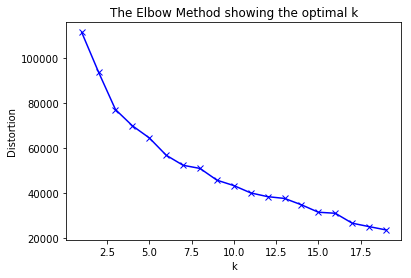

In [124]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [125]:
slope

[[2, -17739.244339690267],
 [3, -16613.848330900844],
 [4, -7201.5587110942],
 [5, -5385.939769942066],
 [6, -7702.097675773381],
 [7, -4467.942000307325],
 [8, -1396.611858762968],
 [9, -5218.570932840368],
 [10, -2401.334838033181],
 [11, -3258.42558359509],
 [12, -1658.6213551457768],
 [13, -791.8276718738562],
 [14, -2837.8064161711445],
 [15, -3289.904958973315],
 [16, -459.7302839547592],
 [17, -4412.844025886134],
 [18, -1522.5331806830072],
 [19, -1463.1729572871045]]

In [126]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,17):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 4
Optimal Number of Clusters = 7
Optimal Number of Clusters = 9
Optimal Number of Clusters = 12
Optimal Number of Clusters = 13
Optimal Number of Clusters = 15


In [127]:
np.unique(true_labels)

array(['D13', 'D14', 'D15', 'E15', 'F08', 'G15', 'I01', 'I02', 'I03',
       'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I15', 'J01',
       'J02', 'J03', 'J04', 'J05', 'J06', 'J07', 'J08', 'J10', 'J15',
       'K01', 'K02', 'K03', 'K04', 'K05', 'K06', 'K07', 'K08', 'L01',
       'L02', 'L03', 'L04', 'L05', 'L06', 'L08', 'L09', 'L15', 'M01',
       'M02', 'M03', 'M04', 'M05', 'M06', 'N01', 'N02', 'N03', 'N04',
       'N05', 'N06', 'N15', 'O01', 'O02', 'O03', 'O04', 'O05', 'O06',
       'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P15', 'Q01', 'Q02',
       'Q03', 'Q04', 'Q05', 'Q06', 'R01', 'R02', 'R03', 'R04', 'R05',
       'R06', 'R15', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S15', 'T01', 'T03', 'T04', 'T05', 'T15', 'U01', 'U02',
       'U03', 'U04', 'U05', 'U15', 'V15', 'W15'], dtype=object)

In [128]:
kmeansModel_new = KMeans(n_clusters=6)
labels=kmeansModel_new.fit_predict(data)

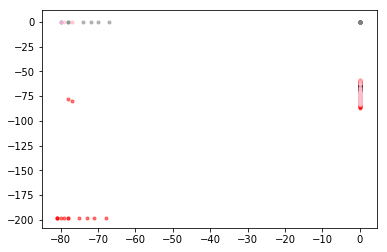

In [129]:
area = np.pi*3
plt.scatter(data[labels==0,0],data[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(data[labels==1,0],data[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(data[labels==2,0],data[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(data[labels==3,0],data[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(data[labels==4,0],data[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(data[labels==5,0],data[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()